<a href="https://colab.research.google.com/github/kujoki/Advanced-Machine-Learning-Masters-2022-/blob/main/AutoViML_bank_scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install autoviml --upgrade --ignore-installed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 133 kB 4.9 MB/s 
     |████████████████████████████████| 76.6 MB 1.3 MB/s 
     |████████████████████████████████| 192.9 MB 78 kB/s 
     |████████████████████████████████| 636 kB 56.6 MB/s 
     |████████████████████████████████| 268 kB 60.5 MB/s 
     |████████████████████████████████| 793 kB 59.0 MB/s 
     |████████████████████████████████| 11.3 MB 45.3 MB/s 
     |████████████████████████████████| 292 kB 43.1 MB/s 
     |████████████████████████████████| 125 kB 50.4 MB/s 
     |████████████████████████████████| 197 kB 48.0 MB/s 
     |████████████████████████████████| 96 kB 3.5 MB/s 
     |████████████████████████████████| 11.2 MB 35.1 MB/s 
     |████████████████████████████████| 199 kB 49.6 MB/s 
     |████████████████████████████████| 1.5 MB 29.6 MB/s 
     |████████████████████████████████| 749 kB 55.7 MB/s 
     |██████████████████████████

In [1]:
from autoviml.Auto_ViML import Auto_ViML

Imported Auto_ViML version: 0.1.710. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            verbose=1)
            

Imported Auto_NLP version: 0.1.01.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)


In [2]:
import pandas as pd 

In [3]:
train = pd.read_csv('/content/sample_data/cs-training.csv')
test = pd.read_csv('/content/sample_data/cs-test.csv')

In [4]:
train.head(10)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.77,45,2,0.80,"9,120.00",13,0,6,0,2.00
1,2,0,0.96,40,0,0.12,"2,600.00",4,0,0,0,1.00
2,3,0,0.66,38,1,0.09,"3,042.00",2,1,0,0,0.00
3,4,0,0.23,30,0,0.04,"3,300.00",5,0,0,0,0.00
4,5,0,0.91,49,1,0.02,"63,588.00",7,0,1,0,0.00
5,6,0,0.21,74,0,0.38,"3,500.00",3,0,1,0,1.00
6,7,0,0.31,57,0,"5,710.00",NaN,8,0,3,0,0.00
7,8,0,0.75,39,0,0.21,"3,500.00",8,0,0,0,0.00
8,9,0,0.12,27,0,46.00,NaN,2,0,0,0,NaN
9,10,0,0.19,57,0,0.61,"23,684.00",9,0,4,0,2.00


In [5]:
train = train.drop(columns = 'Unnamed: 0')
test = test.drop(columns = 'Unnamed: 0')

In [6]:
target = 'SeriousDlqin2yrs'

==================== System Information ====================
System: Linux
Node Name: ca1a5ffcb4c8
Release: 5.4.188+
Version: #1 SMP Sun Apr 24 10:03:06 PDT 2022
Machine: x86_64
Processor: x86_64
====================== CPU Information ======================
Physical cores: 1
Total cores: 2
==================== Memory Information ====================
Total: 12.68GB
Available: 10.84GB
Used: 1.70GB
================== System Information End ==================
##############  D A T A   S E T  A N A L Y S I S  #######################
ALERT! Changing hyperparameter search to RS. Otherwise, Random Forests will take too long for 10,000+ rows
Training Set Shape = (150000, 11)
    Training Set Memory Usage = 12.59 MB
Test Set Shape = (101503, 11)
    Test Set Memory Usage = 8.52 MB
Single_Label Target: ['SeriousDlqin2yrs']
Random shuffling the data set before training
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
       Class  -> Counts -> Percent

2022-07-22 11:55:44.332195: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


#######################################################################################
#####  SULOV:  Searching for Uncorrelated List Of Variables in 4 features ############
#######################################################################################
    there are no null values in dataset...


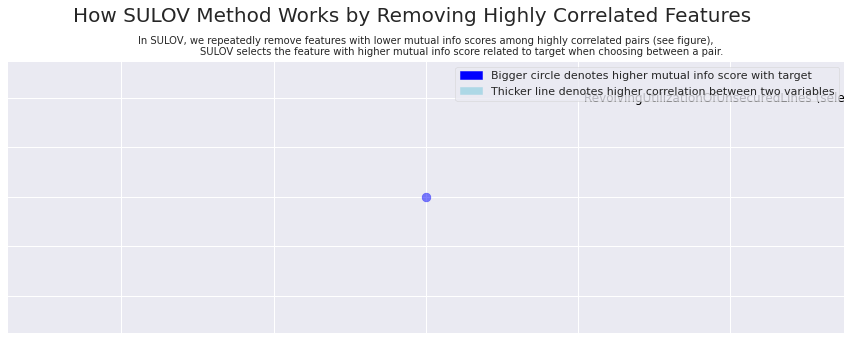

Splitting selected features into float and categorical (integer) variables:
    (4) float variables ...
    (8) categorical vars...
###############################################################################
#######     F E A T U R E   S E L E C T I O N    BY   X G B O O S T    ########
###############################################################################
Current number of predictors = 12 
    Finding Important Features using Boosted Trees algorithm...
        using 12 variables...
        using 10 variables...
        using 8 variables...
        using 6 variables...
        using 4 variables...
        using 2 variables...
Found 12 important features
    Performing limited feature engineering for binning, add_poly and KMeans_Featurizer flags  ...
    Train CV Split completed with TRAIN rows =  120000 , CV rows =  30000
    Binning_Flag set to False or there are no float vars in data set to be binned
    KMeans_Featurizer set to False or there are no float variables in d

tcmalloc: large alloc 1249976320 bytes == 0x161944000 @  0x7f03643bf615 0x592b76 0x4df71e 0x593605 0x515244 0x7f035b283dfc 0x593dd7 0x548ae9 0x51566f 0x7f035b283dfc 0x593dd7 0x5118f8 0x7f035b283dfc 0x549576 0x593fce 0x5118f8 0x7f035b283dfc 0x593dd7 0x5118f8 0x7f035b283dfc 0x549576 0x593fce 0x5118f8 0x7f035b283dfc 0x549576 0x4bca8a 0x59c019 0x595ef6 0x5134a6 0x7f035b283dfc 0x549576
tcmalloc: large alloc 1562476544 bytes == 0x1b467a000 @  0x7f03643bf615 0x592b76 0x4df71e 0x593605 0x515244 0x7f035b283dfc 0x593dd7 0x548ae9 0x51566f 0x7f035b283dfc 0x593dd7 0x5118f8 0x7f035b283dfc 0x549576 0x593fce 0x5118f8 0x7f035b283dfc 0x593dd7 0x5118f8 0x7f035b283dfc 0x549576 0x593fce 0x5118f8 0x7f035b283dfc 0x549576 0x4bca8a 0x59c019 0x595ef6 0x5134a6 0x7f035b283dfc 0x549576
tcmalloc: large alloc 1326915584 bytes == 0x27ec000 @  0x7feb15ece1e7 0x4a3940 0x5b438c 0x5c9ec7 0x59358d 0x515244 0x549576 0x593fce 0x511e2c 0x549576 0x593fce 0x511e2c 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 

5-fold Cross Validation  weighted-f1 = 78.3%


tcmalloc: large alloc 1562476544 bytes == 0x22521e000 @  0x7f03643bf615 0x592b76 0x4df71e 0x593605 0x515244 0x7f035b283dfc 0x593dd7 0x548ae9 0x51566f 0x7f035b283dfc 0x593dd7 0x5118f8 0x7f035b283dfc 0x549576 0x593fce 0x5118f8 0x7f035b283dfc 0x593dd7 0x5118f8 0x7f035b283dfc 0x549576 0x593fce 0x5118f8 0x7f035b283dfc 0x549576 0x4bca8a 0x59c019 0x595ef6 0x5134a6 0x7f035b283dfc 0x549576
tcmalloc: large alloc 1379319808 bytes == 0x54484000 @  0x7f67d30041e7 0x4a3940 0x5b438c 0x5c9ec7 0x59358d 0x515244 0x549576 0x593fce 0x511e2c 0x549576 0x593fce 0x511e2c 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x4bc98a 0x5134a6 0x593dd7 0x511e2c 0x593dd7 0x511e2c 0x549576 0x604173 0x62a809 0x59358d 0x515244


Finding Best Threshold for Highest F1 Score...


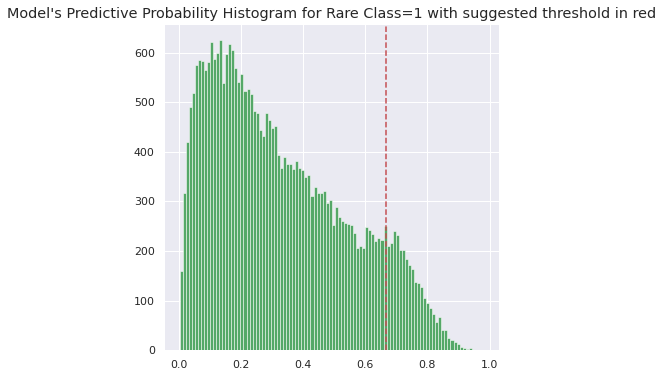

    Using threshold=0.5. However, 0.668 provides better F1=0.43 for rare class...
########################################################
SPE Model Prediction Results on Held Out CV Data Set:
    Regular Accuracy Score = 90.7%


tcmalloc: large alloc 1379319808 bytes == 0x2666000 @  0x7fc64d8ed1e7 0x4a3940 0x5b438c 0x5c9ec7 0x59358d 0x515244 0x549576 0x593fce 0x511e2c 0x549576 0x593fce 0x511e2c 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x4bc98a 0x5134a6 0x593dd7 0x511e2c 0x593dd7 0x511e2c 0x549576 0x604173 0x62a809 0x59358d 0x515244
tcmalloc: large alloc 1379319808 bytes == 0x549d2000 @  0x7fc64d8ed1e7 0x4a3940 0x5b438c 0x4df82c 0x59afff 0x515655 0x549576 0x593fce 0x511e2c 0x549576 0x593fce 0x511e2c 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x4bc98a 0x5134a6 0x593dd7 0x511e2c 0x593dd7 0x511e2c 0x549576 0x604173 0x62a809 0x59358d 0x515244


Balanced Accuracy = 78.31% with Threshold = 0.50
Confusion Matrix:
[[22499  5496]
 [  476  1529]]
              precision    recall  f1-score   support

           0       0.98      0.80      0.88     27995
           1       0.22      0.76      0.34      2005

    accuracy                           0.80     30000
   macro avg       0.60      0.78      0.61     30000
weighted avg       0.93      0.80      0.85     30000

Balanced Accuracy = 73.18% with Threshold = 0.67
Confusion Matrix:
[[26158  1837]
 [  944  1061]]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     27995
           1       0.37      0.53      0.43      2005

    accuracy                           0.91     30000
   macro avg       0.67      0.73      0.69     30000
weighted avg       0.93      0.91      0.91     30000

#####################################################################
Regular threshold = 0.50 is better
No Ensembling of models done since Stacking_F

tcmalloc: large alloc 1379319808 bytes == 0x549d2000 @  0x7fc64d8ed1e7 0x4a3940 0x5b438c 0x5c9ec7 0x59358d 0x515244 0x549576 0x593fce 0x511e2c 0x549576 0x593fce 0x511e2c 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x4bc98a 0x5134a6 0x593dd7 0x511e2c 0x593dd7 0x511e2c 0x549576 0x604173 0x62a809 0x59358d 0x515244


In [ ]:
model, features, trainm, testm = Auto_ViML(
    train,
    target,
    test,
    #sample_submission,
    hyper_param="GS",
    feature_reduction=True,
    scoring_parameter="weighted-f1",
    KMeans_Featurizer=False,
    Boosting_Flag=False,
    Binning_Flag=False,
    Add_Poly=False,
    Stacking_Flag=False,
    Imbalanced_Flag=True,
    verbose=2,
)